In [ ]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM,Dense
import matplotlib.pyplot as plt
import fix_yahoo_finance as fyf
plt.style.use('bmh')


[*********************100%***********************]  1 of 1 downloaded


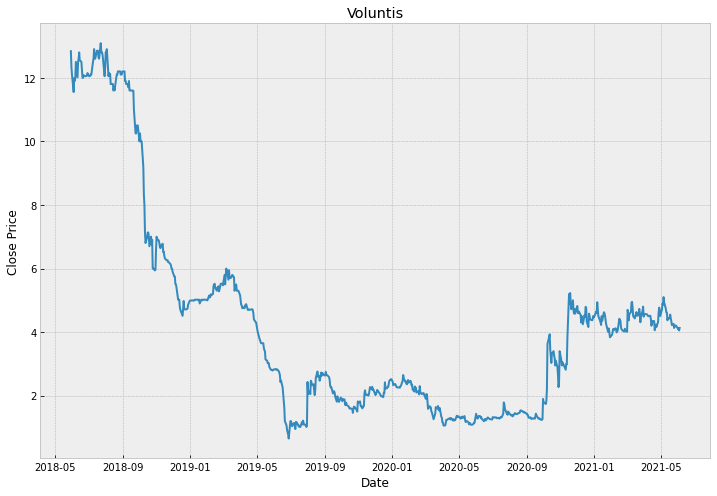

In [ ]:
df= fyf.download('ALVTX.PA',start='2012-1-1')
plt.figure(figsize=(12,8))

plt.title('Voluntis')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.plot(df['Adj Close'])
plt.show()

In [ ]:
df.shape

In [ ]:
#create data frame with only the close price
data = df.filter(['Adj Close'])
#convert it to a numpy array
#data = np.array(data)
#training lengh
training_data_len = math.ceil(len(data)*.8)
training_data_len

In [ ]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scale_data = scaler.fit_transform(data)

scale_data.shape

In [ ]:
#create the training set
train_data = scale_data[0:training_data_len,:]
#split the data : x_train , y_train
x_train = []
y_train = []
for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i , 0])
  y_train.append(train_data[i,0])

In [ ]:
#convert x_train and y_train to numpy arrays
x_train , y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [ ]:
x_train.shape

(1867, 60, 1)

In [ ]:
#model
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.fit(x_train,y_train,batch_size=1,epochs=1)

1867/1867 [==============================] - 42s 21ms/step - loss: 0.0026


In [ ]:
test_data = scale_data[training_data_len - 60: , :]
x_test = []
y_test = np.array(data)[training_data_len:,:]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [ ]:
x_test = np.array(x_test)
x_test= np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

1.0266190967223239

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


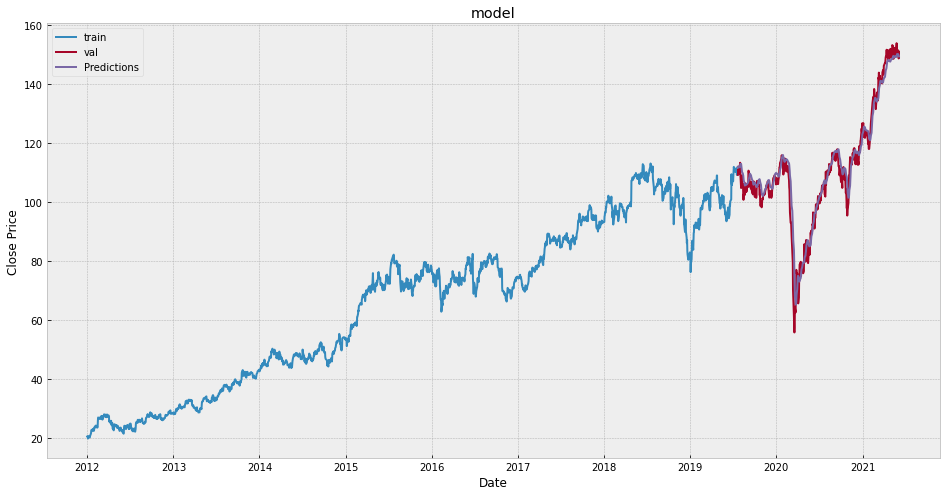

In [ ]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['pred'] = predictions


plt.figure(figsize=(16,8))
plt.title('model')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.plot(train['Adj Close'])
plt.plot(valid[['Adj Close','pred']])
plt.legend(['train','val','Predictions'],loc='upper left')
plt.show()